In [58]:
import numpy as np
import pathlib
import json
import pylab as plt
import seaborn as sns; sns.set()

In [59]:
with open('change_freq.json') as f:
    data = json.loads(f.read())

In [107]:
len(data)

31

In [60]:
hand_languages = ['md5_language', 'base2_language', 'base8_language']

In [92]:
def get_min_max(data, utterance_length=None):
    name, distance_table = None, None
    min_max = None

    for lang in data:
        if lang['name'] in hand_languages: continue
        if utterance_length is not None and len(lang['change_freq'][0]) != utterance_length: continue
            
        if min_max is None or lang['max'][0] < min_max:
            name = lang['name']
            min_max = lang['max'][0]
            distance_table = lang['change_freq']
    return name, min_max

get_min_max(data, 10)

('16280863_0', 0.19218750298023224)

In [100]:
def get_max_min(data, utterance_length=None):
    name, distance_table = None, None
    max_min = None

    for lang in data:
        if lang['name'] in hand_languages: continue
        if utterance_length is not None and len(lang['change_freq'][0]) != utterance_length: continue

        if max_min is None or lang['min'][0] > max_min:
            name = lang['name']
            max_min = lang['min'][0]
            distance_table = lang['change_freq']
    return  name, max_min
get_max_min(data, 5)

('16278573_0', 0.03750000149011612)

In [101]:
as_dict = dict((z['name'], z) for z in data)

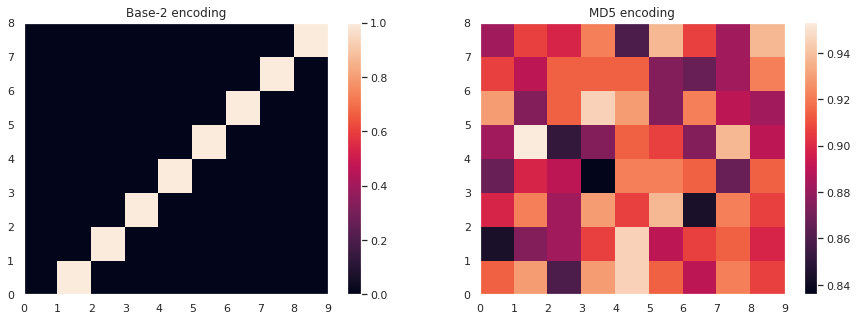

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

t = np.array(as_dict['base2_language']['change_freq'])[:, :-1]
im = ax[0].pcolor(t)
ax[0].set_title("Base-2 encoding")
clb = plt.colorbar(im, ax=ax[0])


t = np.array(as_dict['md5_language']['change_freq'])[:, :-1]
im = ax[1].pcolor(t)
ax[1].set_title("MD5 encoding")
clb = plt.colorbar(im, ax=ax[1])

plt.show()

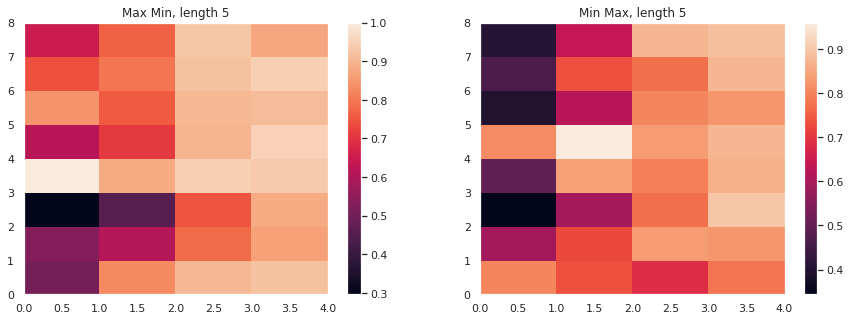

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

(max_min, _), (min_max, _) = get_max_min(data, utterance_length=5), get_min_max(data, utterance_length=5)


t = np.array(as_dict[max_min]['change_freq'])[:, :-1]
im = ax[0].pcolor(t)
ax[0].set_title("Max Min, length 5")
clb = plt.colorbar(im, ax=ax[0])


t = np.array(as_dict[min_max]['change_freq'])[:, :-1]
im = ax[1].pcolor(t)
ax[1].set_title("Min Max, length 5")
clb = plt.colorbar(im, ax=ax[1])

plt.show()

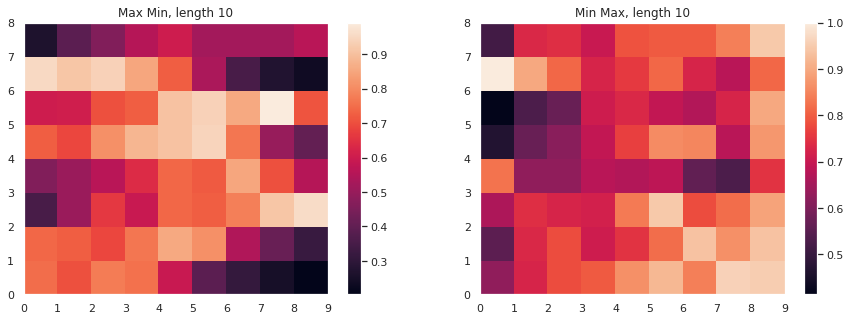

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

(max_min, _), (min_max, _) = get_max_min(data, utterance_length=10), get_min_max(data, utterance_length=10)


t = np.array(as_dict[max_min]['change_freq'])[:, :-1]
im = ax[0].pcolor(t)
ax[0].set_title("Max Min, length 10")
clb = plt.colorbar(im, ax=ax[0])


t = np.array(as_dict[min_max]['change_freq'])[:, :-1]
im = ax[1].pcolor(t)
ax[1].set_title("Min Max, length 10")
clb = plt.colorbar(im, ax=ax[1])

plt.show()

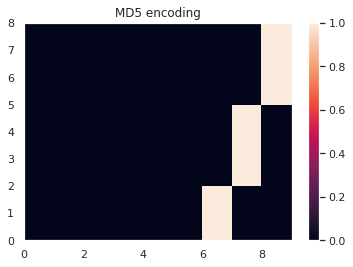

In [105]:
fig, ax = plt.subplots()

t = np.array(as_dict['base8_language']['change_freq'])[:, :-1]
im = plt.pcolor(t)
clb = plt.colorbar()
ax.set_title("MD5 encoding")
plt.show()

In [106]:
data = logs['transformer_language.txt']


fig, ax = plt.subplots()

im = pl.pcolor(data)
clb = pl.colorbar()
clb.ax.set_title("Acc(Y)")

ax.set_title("Transformer language")
pl.show()



NameError: name 'logs' is not defined

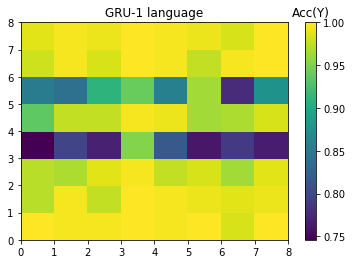

In [153]:
data = logs['vocab8_language_1.txt']

fig, ax = plt.subplots()

im = pl.pcolor(data)
clb = pl.colorbar()
clb.ax.set_title("Acc(Y)")

ax.set_title("GRU-1 language")
pl.show()




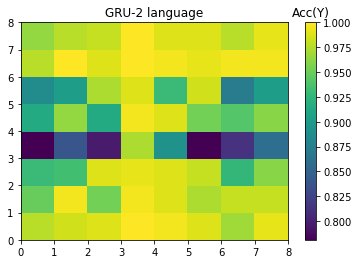

In [154]:
data = logs['vocab8_language_2.txt']

fig, ax = plt.subplots()

im = pl.pcolor(data)
clb = pl.colorbar()
clb.ax.set_title("Acc(Y)")

ax.set_title("GRU-2 language")
pl.show()





In [155]:
logs.keys()

dict_keys(['base2_language.txt', 'transformer_language.txt', 'base8_language.txt', 'md5_language.txt', 'vocab8_language_1.txt', 'vocab8_language_2.txt'])

In [163]:
def get_language(h):
    h = h.split()
    h = filter(lambda x: '--language=' in x, h)
    h = list(h)
    assert len(h) == 1
    return h[0].split('=')[-1][:-2].split('/')[-1]

def get_target(h):
    h = h.split()
    h = filter(lambda x: '--target=' in x, h)
    h = list(h)
    assert len(h) == 1
    return int(h[0].split('=')[-1][:-2])

def parse_file(path, lang2bit2adversarial): 
    with open(path, 'r') as f:
        h = f.readline()
        f.readline()
        lang = get_language(h)
        target = get_target(h)
        
        if lang not in lang2bit2adversarial:
            lang2bit2adversarial[lang] = np.zeros(8) - 1
        
        for line in f:
            if line.startswith('#'): continue
            
            parsed = json.loads(line)
            if parsed['mode'] != 'test': continue
            if parsed['zeroes'] == 0.0: continue

            lang2bit2adversarial[lang][target] = parsed['acc_X']

    return lang2bit2adversarial
        
def parse_logs(root):
    root = pathlib.Path(root).absolute()
    collected = {}
    for file in root.glob('*.out'):
        parse_file(file, collected)
    return collected
        
logs = parse_logs('/private/home/kharitonov/nest/explain/2019_08_24_10_38_26/')

In [166]:
logs['transformer_language.txt']

array([ 0.8125    ,  0.78515625,  0.81640625,  0.8359375 ,  0.8203125 ,
        0.84375   , -1.        ,  0.8359375 ])